# Assessment Review

### Student 1 - Jesus

In [1]:
# Import libraries - will need pandas, matplotlib, seaborn, and scipy's stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# Import the data - it's saved as 'auto-mpg.csv'
df = pd.read_csv("auto-mpg.csv")

In [3]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
# Describe our data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Drop the 'car name' and 'model year' columns, for simplicity
df.drop(columns=["car name", "model year"], inplace=True)

## Hypothesis Testing

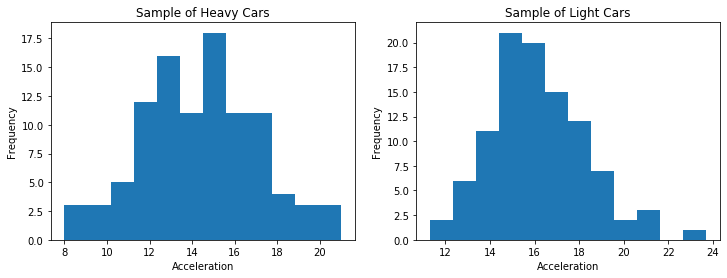

In [7]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### Student 2 - Ezgi

Car manufacturers want to know if light cars accelerate faster than heavy cars.

Set up the null and alternative hypotheses for this test:

In [ ]:
'''
Null hypothesis: no significance difference between light and heavy cars

Alternative hypothesis: light cars accelerate faster than heavy cars
'''

### Student 3 - Mark

In [17]:
# Now test it! Use alpha = 0.05 and assume the samples have equal variance
stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'])

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

### Student 4 - Lenaya

In [ ]:
'''
Analyze your results - can you reject the null hypothesis?

Yes, because:
P-value (0.000001209) < alpha (0.05 - one tailed test)
or 
Critical threshold based on .05 is 1.64, and our test statistic (5.0087) 
is greater than our threshold
'''

## Ordinary Least Squares Regression Practice

Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. Sounds like a regression problem! But first let's further explore the data.

### Student 5 - Sri

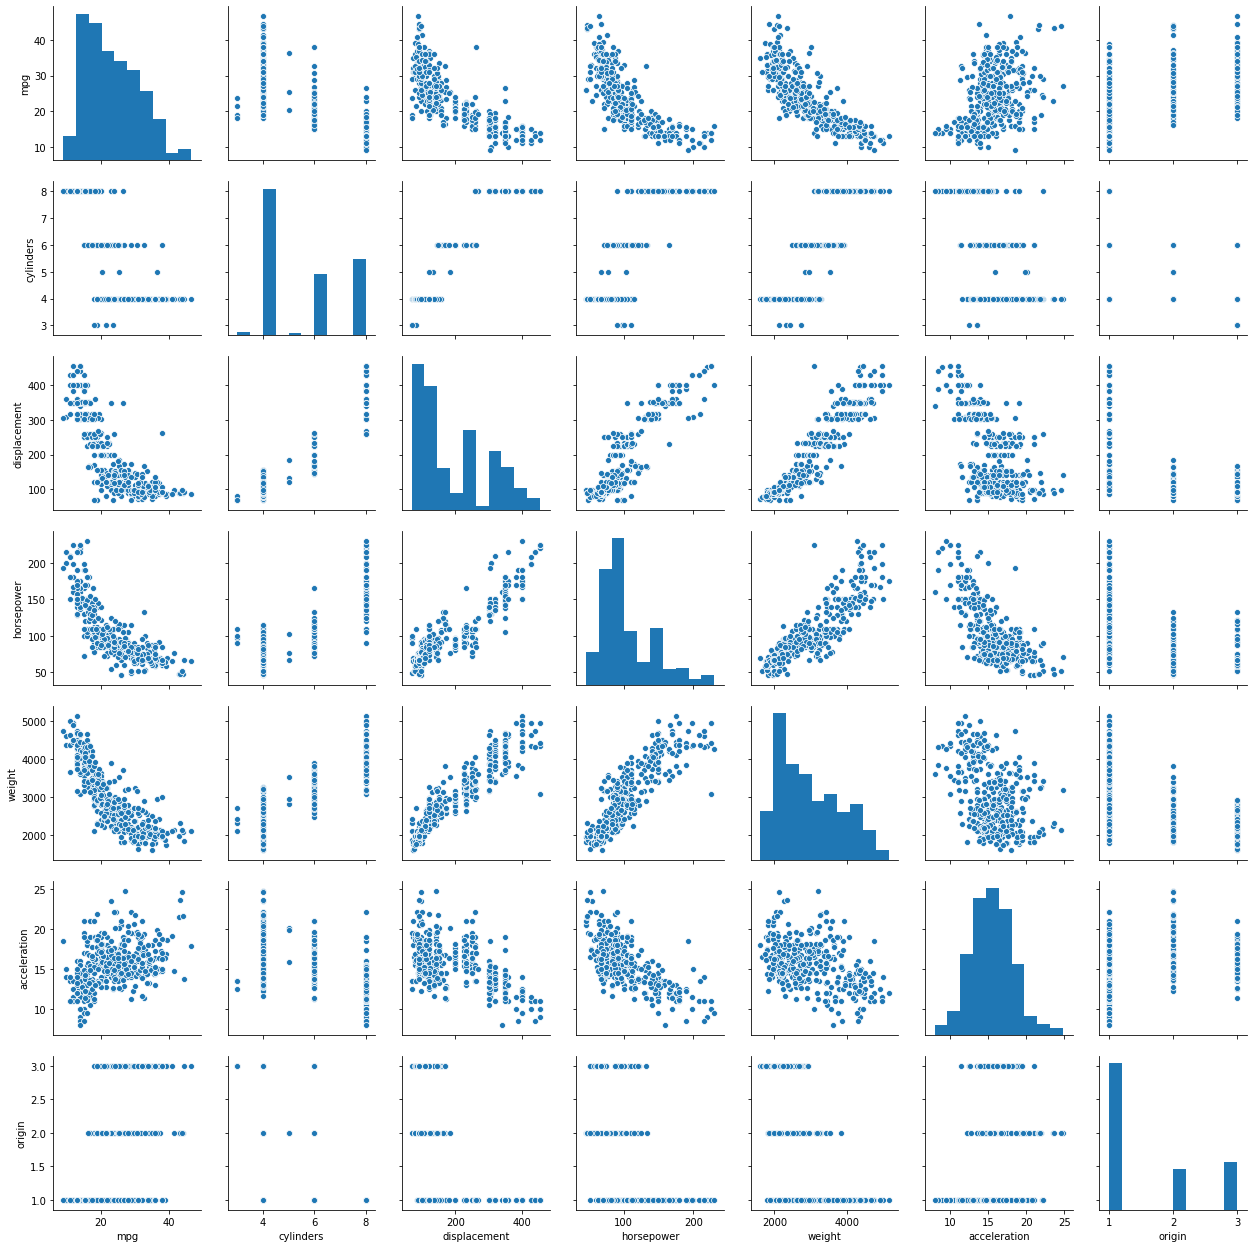

In [18]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)
plt.show()

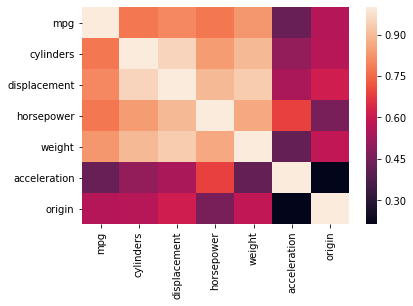

In [21]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
# Use .abs to grab the absolute value of the correlation
sns.heatmap(df.corr().abs())
plt.show()

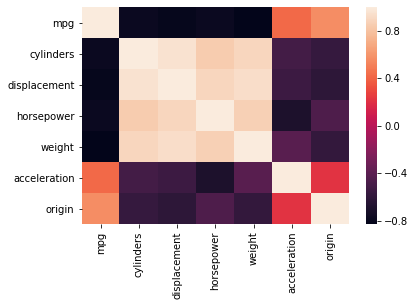

In [22]:
# Now without the absolute value, to show direction of the correlation
sns.heatmap(df.corr())
plt.show()

### Student 6 - Taki

Let's discuss these variables, looking both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [ ]:
'''
Analyze the relationships between variables here

Only normally distributed data is 'Acceleration' it looks like

Have some categorical variables - cylinders, origin

Have some multicollinearity between features (like weight/displacement,
horsepower/displacement, everything in that pale beige box)

Many of the features (like weight, displacement, horsepower) appear strongly
correlated with the target variable (mpg)
'''

### Student 7 - Anh

Going a step further - what do you want to do to prepare this data for a regression model? List at least two things you'd want to do before running a regression model using any of this data.

In [ ]:
'''
List at least two preparation steps here

1. Remove outliers
2. Remove collinear features
3. Normalize and scale data <--
'''

### Student 8 - Tim

There's one thing we really need to do before running a regression on this data. Perform this step below.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [26]:
# Need to scale! But first, removing the target from our independent variables
target = "mpg"
used_cols = [c for c in df.columns.to_list() if c not in ['mpg']]

X = df[used_cols]
y = df[target]

In [28]:
# Code here - scaling the independent variables
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=used_cols)

In [29]:
X_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0


In [30]:
X_scaled.describe()

,cylinders,displacement,horsepower,weight,acceleration,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.494388,0.326646,0.317768,0.386897,0.448888,0.288265
std,0.341157,0.270398,0.209191,0.240829,0.164218,0.402759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.095607,0.157609,0.173589,0.343750,0.000000
50%,0.200000,0.214470,0.258152,0.337539,0.446429,0.000000
75%,1.000000,0.536822,0.434783,0.567550,0.537202,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Student 9 - Abzal

Now it's time to run a simple linear regression model! Using statsmodels' OLS function, imported below, pick a single variable to run and evaluate the result.

In [32]:
# Importing statsmodels' OLS function
import statsmodels.api as sm
# Link from Bryan's notebook, might be helpful:
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [33]:
# Code here for single variable regression model plus a summary output
model = sm.OLS(y, X_scaled['weight'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.445
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                              313.8
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                    5.64e-52
Time:                        18:00:13   Log-Likelihood:                         -1697.9
No. Observations:                 392   AIC:                                      3398.
Df Residuals:                     391   BIC:                                      3402.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Student 10 - Boi

In [ ]:
'''
Analysis here - how did we do? 
R-squared is 0.445 - not great
'''

### All Students!

All together now... let's run a regression output for all of our independent variables!

In [34]:
# Code here for a multiple regression model with all of our independent vars
model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              824.7
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                   1.27e-216
Time:                        18:02:26   Log-Likelihood:                         -1298.7
No. Observations:                 392   AIC:                                      2609.
Df Residuals:                     386   BIC:                                      2633.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
'''
Analysis here - how did we do?
R-squared is 0.928 - much better!

In this model, what are the most important variable(s)?
Look at coefficients - can see some of them are quite large
But, also look at standard error - can see that the multicollinearity between
some of our independent variables is manifesting here and making it hard
for our model to say exactly what the coefficient should be

In terms of which variables are 'significant' - can look at the generated
P-values and the ones which are written as '0.000' are reading as significant
in this model (a fairly naive but still useful way to look at this output)
'''

## Further Practice

Do the same as above, but using selections of independent variables.

In [ ]:
# Code here


In [ ]:
'''
Analysis here
'''

Can also do some of the other steps we listed above that may help improve our model! Use Bryan's notebook for reference!